In [1]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_boston
from random import seed
from random import randrange
from csv import reader
from math import sqrt
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error

In [2]:
boston_data=pd.DataFrame(load_boston().data,columns=load_boston().feature_names)
boston_data['PRICE'] = load_boston().target
boston_data.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [3]:
X = load_boston().data
Y = load_boston().target
boston_data=pd.DataFrame(X)
X=boston_data
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
#Splitting the data into train and test
from sklearn.model_selection import train_test_split
X_tr, X_test, y_tr, y_test=train_test_split(X, Y, test_size=0.3)
print(X_tr.shape,y_tr.shape)
print(X_test.shape,y_test.shape)

scaler = preprocessing.StandardScaler()
X_tr = scaler.fit_transform(X_tr)
X_test=scaler.transform(X_test)

df_train=pd.DataFrame(X_tr)
df_train['PRICE']=y_tr
df_train.head()

(354, 13) (354,)
(152, 13) (152,)


,0,1,2,3,4,5,6,7,8,9,10,11,12,PRICE
0,-0.370118,-0.483201,-0.690751,3.708099,-0.394634,0.628960,-0.054327,-0.087273,-0.169047,-0.564427,-0.498844,0.022491,-0.611354,29.0
1,0.769068,-0.483201,1.065529,-0.269680,1.635580,0.174171,1.021894,-0.847695,1.690143,1.578005,0.804409,0.309609,0.950037,17.1
2,0.347091,-0.483201,1.065529,-0.269680,1.635580,0.081792,0.993849,-0.844389,1.690143,1.578005,0.804409,-0.447753,0.714535,14.9
3,-0.413330,1.231616,-0.659758,-0.269680,-0.917436,0.810876,-0.885155,0.207637,-0.633844,-0.880719,-0.405754,0.431544,-1.301524,32.0
4,-0.409458,0.802912,-0.878186,-0.269680,-1.082990,0.155695,-2.112117,1.534207,-0.401446,-0.606201,-0.871202,0.184218,-1.000681,23.7


In [5]:
df_test=pd.DataFrame(X_test)
df_test['PRICE']=y_test
df_test.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,PRICE
0,0.001540,-0.483201,1.065529,3.708099,1.443886,3.548136,0.520592,-0.924562,1.690143,1.578005,0.804409,-0.040483,-0.987068,21.9
1,1.215546,-0.483201,1.065529,-0.269680,1.226052,-0.563440,0.934254,-0.983314,1.690143,1.578005,0.804409,0.431544,0.518510,12.7
2,-0.400985,0.459949,-0.740930,-0.269680,-1.056850,-0.081648,0.390885,2.023009,-0.285246,-0.427168,0.292417,0.200156,-0.325485,20.5
3,0.078063,-0.483201,1.283957,-0.269680,2.777031,-1.158929,1.120051,-1.160768,-0.517645,0.008480,-1.755552,0.431544,1.889321,15.6
4,-0.413029,-0.483201,2.179808,-0.269680,0.250155,-0.574809,0.972815,-0.875873,-0.866243,-1.274592,0.292417,0.236269,0.685948,18.8


## Implemented sklearn SGDRegressor

In [6]:
clf = SGDRegressor(loss='squared_loss',learning_rate='constant',eta0=0.01,penalty=None,n_iter=90,max_iter=100)
clf.fit(X_tr, y_tr)
mse1=mean_squared_error(y_test, clf.predict(X_test))
print('MSE for sklearn SGD:',mse1)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:73: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


MSE for sklearn SGD: 24.629187553988494


In [7]:
w1=clf.coef_
print(w1)

[-1.05876403  1.10670107  0.41815688  1.03609787 -2.42792503  2.82744509
 -0.02543887 -3.27241512  2.86406972 -2.28975277 -2.17130818  0.8379702
 -3.42179086]


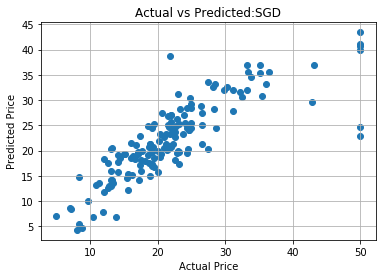

In [8]:
plt.scatter(y_test,clf.predict(X_test))
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted:SGD')
plt.grid()
plt.show()

In [9]:
 W,B,iteration,lr_rate,k=np.zeros(shape=(1,13)),0,900,0.01,25 #intialise W and B to zero
itr=[]
loss_tr=[]
loss_test=[]
while iteration>=0:
    w,b,dl_by_dw,dl_by_db=W,B,np.zeros(shape=(1,13)),0
    data=df_train.sample(k) #sampling random k=batch size=22 data
    x=np.array(data.drop('PRICE',axis=1))
    y=np.array(data['PRICE'])



    data_t=df_test.sample(k) #sampling random k=batch size=22 data
    x_t=np.array(data_t.drop('PRICE',axis=1))
    y_t=np.array(data_t['PRICE'])



    for i in range(k):
        dl_by_dw+=(-2)*x[i]*(y[i]-(np.dot(w,x[i])+b))#partial differentiation wrt w dl/dw=1/k(-2x)*(y-wTx-b)
        dl_by_db+=(-2)*(y[i]-(np.dot(w,x[i])+b))#partial differentiation wrt b dl/db=1/k(-2)*(y-wTx-b)
        

    W=(w-lr_rate*(dl_by_dw)/k)
    B=(b-lr_rate*(dl_by_db)/k)

    y_predict3=[]
    for i in range(len(x)):
        val=np.asscalar(np.dot(W,x[i])+B)
        y_predict3.append(val)

    mse2=mean_squared_error(y,y_predict3)
    #mse2=((y-val)**2).mean(axis=0)
    loss_tr.append(mse2)
    itr.append(iteration)

    y_predict4=[]
    for i in range(len(x_t)):
        val1=np.asscalar(np.dot(W,x_t[i])+B)
        y_predict4.append(val1)

    mse3=mean_squared_error(y_t,y_predict4)
    loss_test.append(mse3)

    iteration-=1

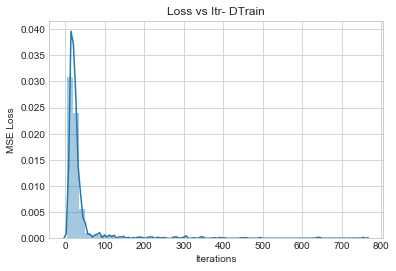

In [10]:
import seaborn as sns
sns.set_style('whitegrid')
plot1=sns.distplot(loss_tr)
plt.xlabel('Iterations')
plt.ylabel('MSE Loss')
plt.title('Loss vs Itr- DTrain')
plt.show()

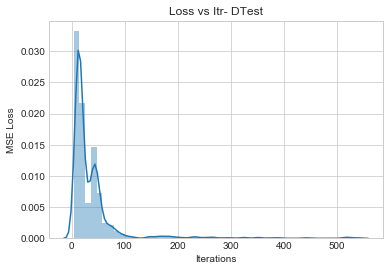

In [11]:
import seaborn as sns
sns.set_style('whitegrid')
plot1=sns.distplot(loss_test)
plt.xlabel('Iterations')
plt.ylabel('MSE Loss')
plt.title('Loss vs Itr- DTest')
plt.show()


In [12]:
print(W)
print(B)

[[-0.91140762  0.99583691  0.11828648  1.21343451 -2.16352236  2.86517195
  -0.07279092 -3.09446114  1.82263233 -1.48278888 -2.01598704  0.74522051
  -3.35618684]]
[22.73435944]


In [14]:
y_predict2=[]
for i in range(len(X_test)):
    val=np.dot(W,X_test[i])+B #val= wTx+b
    y_predict2.append(np.asscalar(val))
    
mse4=mean_squared_error(y_test,y_predict2)
print('MSE for Loop SGD:',mse4) 

MSE for Loop SGD: 25.000275068073993


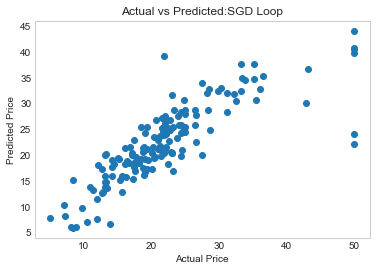

In [15]:
plt.scatter(y_test,y_predict2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted:SGD Loop')
plt.grid()
plt.show()

In [16]:
from prettytable import PrettyTable
x1= PrettyTable()
x1.field_names=['MSE-Loop','MSE-Sklearn']
x1.add_row([mse4,mse1])
print(x1)
print('\n','*'*53,'\n')
x2 = PrettyTable()
x2.field_names=['Weight vector Loop','Weight vector SGD sklearn']
for i in range(13):
 x2.add_row([W[0][i],w1[i]])
print(x2)

+--------------------+--------------------+
|      MSE-Loop      |    MSE-Sklearn     |
+--------------------+--------------------+
| 25.000275068073993 | 24.629187553988494 |
+--------------------+--------------------+

 ***************************************************** 

+---------------------+---------------------------+
|  Weight vector Loop | Weight vector SGD sklearn |
+---------------------+---------------------------+
| -0.9114076189874931 |    -1.0587640290563363    |
|  0.995836905199803  |     1.1067010719558559    |
| 0.11828648185185281 |    0.41815687574589877    |
|  1.2134345123880568 |     1.036097867727762     |
| -2.1635223581590055 |    -2.4279250302367084    |
|  2.865171948573284  |     2.827445090803685     |
| -0.0727909233586307 |   -0.025438865842593375   |
| -3.0944611429823627 |    -3.2724151241029604    |
|  1.8226323277993917 |     2.8640697195717593    |
| -1.4827888777490745 |     -2.289752766154205    |
| -2.0159870401474933 |    -2.1713081799464615